# Part 1: Exploration
Group collaboration

We are interested in studying various aspects around public attitude on period tracker surrounding the overturning of Roe V. Wade by surveying tweets from Twitter, given both of the user groups are young people with access to smartphone. 


**Table of Contents**
1. [Preparing the dataset](#sec1)
2. [Exploration](#sec2)



### 1. Preparing the dataset

With Professor Mustafaraj's help, we were provided with a clean dataset of tweets between October 2021 and October 2022 containing relevant keywords to "menstruation" and "period tracker", along with information about their authors on a separate file.




In [105]:
from urllib.parse import urlparse
from collections import defaultdict, Counter
import pandas as pd
import numpy as np
import csv, json

#Load the data
tweets = pd.read_csv('tweets_oneyear.csv')
users = pd.read_csv('users_oneyear.csv')

In [106]:
users.head()

,id,username,name,description,created_at,verified,followers_count,following_count,tweet_count,listed_count,tweets_SRH
0,759251,CNN,CNN,It’s our job to #GoThere & tell the most diffi...,2007-02-09 00:35:02+00:00,True,60223259,1104,386727,156534,3
1,807095,nytimes,The New York Times,News tips? Share them here: https://t.co/ghL9O...,2007-03-02 20:41:42+00:00,True,54540834,871,487456,217705,5
2,742143,BBCWorld,BBC News (World),"News, features and analysis from the World's n...",2007-02-01 07:44:29+00:00,True,38591160,18,352741,133492,1
3,5988062,TheEconomist,The Economist,News and analysis with a global perspective. S...,2007-05-12 13:04:50+00:00,True,27054214,150,321452,122421,8
4,3108351,WSJ,The Wall Street Journal,Sign up for our newsletters and alerts: https:...,2007-04-01 06:22:13+00:00,True,20244973,1079,386577,127303,4


In [107]:
#renaming columns for merging
tweets = tweets.rename(columns={'author_id': 'user_id'}) 
users = users.rename(columns={'id': 'user_id'})
df = pd.merge(tweets, users, on=["user_id"])
df.head()

,id,created_at_x,user_id,text,retweet_count,reply_count,like_count,quote_count,username,name,description,created_at_y,verified,followers_count,following_count,tweet_count,listed_count,tweets_SRH
0,1448802667292200966,2021-10-15 00:07:27+00:00,521716695,I wonder how long before women are not allowed...,0,0,1,0,_sconsolato,Dewi ♀,"“Lasciate ogne speranza, voi ch'entrate”. | I ...",2012-03-11 21:57:41+00:00,False,710,671,28821,1,3
1,1464783777381683206,2021-11-28 02:30:41+00:00,521716695,I've been watching these mid-century education...,0,0,0,0,_sconsolato,Dewi ♀,"“Lasciate ogne speranza, voi ch'entrate”. | I ...",2012-03-11 21:57:41+00:00,False,710,671,28821,1,3
2,1501648630725369859,2022-03-09 19:58:27+00:00,521716695,@dan_nailed @PurveyorOfPest1 @mjeslfc @BioTran...,0,1,3,0,_sconsolato,Dewi ♀,"“Lasciate ogne speranza, voi ch'entrate”. | I ...",2012-03-11 21:57:41+00:00,False,710,671,28821,1,3
3,1448803736076365824,2021-10-15 00:11:42+00:00,595644055,"@Draconacticus @HamillHimself When we say ""per...",0,1,0,0,JordansMom769,Cindy H,NaN,2012-05-31 16:55:49+00:00,False,17,32,349,0,1
4,1448804546059268098,2021-10-15 00:14:55+00:00,1154281865441767424,"“Menstruation is when you have a kid, right?”",0,0,0,0,_queenoffools,N8🕸,"RESILIENT. Jack of all trades, master of none. ♠️",2019-07-25 06:46:57+00:00,False,306,297,6203,0,1


### 2. Exploration

#### a. Who tweets what

Let's see who are the most frequent tweeters in the dataset

In [84]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Aggregating the dataset by username and tweet_id

In [117]:
tweets_count = df[['username', 'id']].reset_index(drop = 'True')
tweets_count.head()

,username,id
0,_sconsolato,1448802667292200966
1,_sconsolato,1464783777381683206
2,_sconsolato,1501648630725369859
3,JordansMom769,1448803736076365824
4,_queenoffools,1448804546059268098


In [121]:
user_group = tweets_count.groupby(['username'],as_index=False).agg('count').rename(columns = {'id': 'count'})
top_tweeters = user_group.sort_values('count', ascending=False)[:20]
top_tweeters

,username,count
54847,SoulfullySue,1163
54845,Soulecting,910
126294,type_pervert,329
91183,imkhan_0555,269
57079,Talisicup,230
541,20naomijess22,216
18526,Endometriosis11,215
48565,RaisingTeensUg1,185
127646,vigyanveda,180
120081,sonofEritheson1,168


We can visualize the amount of tweets these accounts produced in the dataset

<AxesSubplot: title={'center': 'Top 20 tweeters'}, xlabel='username'>

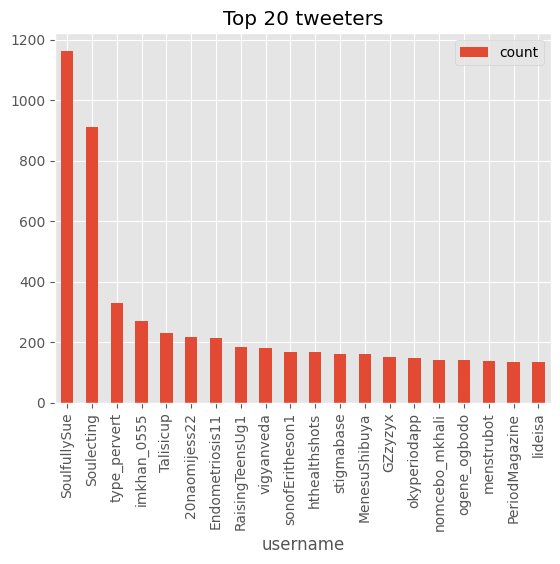

In [94]:
top_tweeters.plot(kind='bar', x = 'username', y= 'count', title="Top 20 tweeters")

Upon examining these users, we realized that the top 4 accounts were producing a high number of tweets that are either unrelated to our subject or bot-like, so we will separate them from our dataset to avoid skewing the data.

In [108]:
outliers = list(top_tweeters['username'][:4])
data = df.loc[~df['username'].isin(outliers)]
data.shape

(193204, 18)

In [110]:
data.to_csv('data.csv')

#### b. Making the training dataset

To answer our various quetions around the topic of period tracker and data privacy, we've decided that we want to determine if a tweet is:

1. Written by an individual, as our target population is individual users of period trackers
2. About period tracker
3. Expresses concern over data privacy especially pertaining to period tracker
4. Expresses any of the 3 basic sentiment: negative, neutral, positive

Thus, we've decided to randomly sample 3000 tweets from our original dataset and manually label 4 features for each tweet as basis for our classifier algorithms. 

##### Sampling the data:

In [20]:
import random
nrows = len(df)
indices = random.sample(range(0,nrows),3000)
df_train = df.loc[indices]

In [21]:
df_train.head()

,id,created_at_x,user_id,text,retweet_count,reply_count,like_count,quote_count,username,name,description,created_at_y,verified,followers_count,following_count,tweet_count,listed_count,tweets_SRH
89534,1511835211692077058,2022-04-06 22:36:17+00:00,1329282599475236864,@Margare19954289 I was shocked to discover how...,0,0,1,0,LeslieG03751183,Leslie GG/ Cheeky Oma ☮️💖🙀🤭🤢🙄😷💚🇺🇦🙏🏻🇺🇦,"Sibling, Mom, Oma , Wife, Caregiver. I sew, I ...",2020-11-19 04:37:43+00:00,False,183,129,3868,0,1
59695,1501587893264998401,2022-03-09 15:57:06+00:00,1308419941851430917,Me: cannot figure out why my skin is going nut...,0,1,1,0,ModelAyshaMirza,Aysha 💋 Did you cheat? #ProtectWomen 💕🇺🇸🧬🥇,#MuslimModelsMatter💋 Model 🩺#FutureMD 🙏🏼 @Publ...,2020-09-22 14:56:44+00:00,False,1159,1688,32699,6,2
163971,1548449627577282560,2022-07-16 23:28:54+00:00,2194982186,@CBCNews Since Covid vaccines first became ava...,0,0,0,0,HaolinS,TSH,https://t.co/3udxya5lqP,2013-11-14 22:48:44+00:00,False,4,54,16803,0,26
134271,1539564861797142528,2022-06-22 11:04:01+00:00,363756053,@darji8114 @Gonzz70998539 Du sollst es dir nur...,0,0,4,0,Vanillekind,DieDrei!!!,"Muddi, Gutmensch, Schulbegleiterin für einen z...",2011-08-28 16:52:51+00:00,False,217,372,3591,11,4
71930,1530811214053658624,2022-05-29 07:20:09+00:00,42606652,महिलाओं के पीरियड्स को लेकर IAS अफसर ने चलाया ...,9,0,122,0,aajtak,AajTak,"AajTak covers breaking news, latest news in po...",2009-05-26 11:31:00+00:00,True,18921459,43,727621,5108,4


Exporting the table for manual labeling:

In [23]:
df_train.to_csv('tweets_train.csv')

After 2 weeks of manual labeling between 6 members: Rita, Lan, Candace, Angela, Meg, Emma, we've ended up with the following dataset:

In [15]:
training_tweets = pd.read_csv('training_tweets.csv')
training_tweets.head()

,tweet_id,time,user_id,text,retweet_count,reply_count,like_count,quote_count,username,name,...,verified,followers_count,tweet_count,tweets_SRH,following_count,user_type,listed_count,period_tracking,data_concern,sentiment
0,1511835211692077058,2022-04-06 22:36:17+00:00,1.329283e+18,@Margare19954289 I was shocked to discover how...,0,0,1,0,LeslieG03751183,Leslie GG/ Cheeky Oma ☮️💖🙀🤭🤢🙄😷💚🇺🇦🙏🏻🇺🇦,...,False,183,3868.0,1,129,indv,0.0,False,False,negative
1,1501587893264998401,2022-03-09 15:57:06+00:00,1.308420e+18,Me: cannot figure out why my skin is going nut...,0,1,1,0,ModelAyshaMirza,Aysha 💋 Did you cheat? #ProtectWomen 💕🇺🇸🧬🥇,...,False,1159,32699.0,2,1688,indv,6.0,True,False,neutral
2,1548449627577282560,2022-07-16 23:28:54+00:00,2.194982e+09,@CBCNews Since Covid vaccines first became ava...,0,0,0,0,HaolinS,TSH,...,False,4,16803.0,26,54,org,0.0,False,False,negative
3,1539564861797142528,2022-06-22 11:04:01+00:00,3.637561e+08,@darji8114 @Gonzz70998539 Du sollst es dir nur...,0,0,4,0,Vanillekind,DieDrei!!!,...,False,217,3591.0,4,372,indv,11.0,False,False,neutral
4,1530811214053658624,2022-05-29 07:20:09+00:00,4.260665e+07,महिलाओं के पीरियड्स को लेकर IAS अफसर ने चलाया ...,9,0,122,0,aajtak,AajTak,...,True,18921459,727621.0,4,43,org,5108.0,False,False,neutral


A few observations we made along the way by going through tweets content was that these conversations were frequently echoing transphobia, especially on topics around having uterus and ovaries, so our questions will refrain from echoing these rhetorics. We also made the following assumptions on labeling our data:

1. Tweets that mentioned "Delete your app" express data privacy concern unless other reasons were stated
2. Individuals who act as public figures are considered organizations. 

Part 2 will explore how my teammate, Rita, and I, Lan Dau, collaborated in building our classifiers from this dataset to answer our questions.